In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [82]:
#read in csv and create dataframe
movie_df = pd.read_csv("group_project/Output/no_lie_for_real_left_off_here.csv")
movie_df.dtypes

Title               object
Year                 int64
Rated               object
Released            object
Runtime            float64
Genre               object
Director            object
Writer              object
Actors              object
Plot                object
Metascore          float64
imdbRating         float64
Rotten Tomatoes    float64
imdbVotes           object
BoxOffice           object
dtype: object

In [88]:
#get list of runtimes for grouping and cleaning purposes
movie_df['Runtime'].unique()

array([165., 111., 135., 137.,  91., 132., 134., 127., 123., 109., 120.,
       122.,  93., 100., 157.,  95.,  90., 128., 106., 118., 150., 209.,
        94., 104., 162., 121.,  96., 129., 177., 103., 140., 113., 119.,
       126.,  82., 197., 117., 101., 108., 107.,  74.,  99., 148.,  89.,
        92., 180., 130.,  75., 138., 115.,  72.,  98., 102., 125., 136.,
        88., 196., 185., 114., 146., 133.,  85.,  87.,  78.,  86., 141.,
       124., 105., 147., 230.,  83., 188., 110.,  80.,  76.,  84., 139.,
        70., 145., 152., 143., 144., 161.,  79., 116.,  97.,  71.,  23.,
       173., 112., 131.,  81., 142., 164.,  77., 163., 155.,  69., 149.,
       174., 238., 181., 156.,  73.,  63., 169.,  66., 151., 168., 158.,
       231., 153., 189., 154., 172., 159., 179.,  55.,  60.,  68., 178.,
       166., 160., 171., 170., 167., 176., 186., 208., 183., 184.,  17.,
       182.,  64.,  nan,  61.,  65.,  50.,  16.,  44.,  67.,   6.,  20.,
        15.,  12.,   9.,   5.,  62.,  14.,  11.])

In [93]:
#remove movies with run time under an hour
cleaned_movie = movie_df.loc[movie_df['Runtime'] > 59]
cleaned_movie.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Metascore,imdbRating,Rotten Tomatoes,imdbVotes,BoxOffice
0,Boyhood,2014,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...",10.0,7.9,9.7,"370,906","$25,352,281"
1,Moonlight,2016,R,18 Nov 2016,111.0,Drama,Barry Jenkins,"Barry Jenkins, Tarell Alvin McCraney","Mahershala Ali, Naomie Harris, Trevante Rhodes",A young African-American man grapples with his...,9.9,7.4,9.8,"336,819","$27,854,932"
2,Roma,2018,R,14 Dec 2018,135.0,Drama,Alfonso Cuarón,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",A year in the life of a middle-class family's ...,9.6,7.7,9.6,"171,928",NaN
3,Manchester by the Sea,2016,R,16 Dec 2016,137.0,Drama,Kenneth Lonergan,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler",A depressed uncle is asked to take care of his...,9.6,7.8,9.6,"321,828","$47,695,371"
4,Gravity,2013,PG-13,04 Oct 2013,91.0,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón, Jonás Cuarón","Sandra Bullock, George Clooney, Ed Harris","Dr Ryan Stone, an engineer on her first time o...",9.6,7.7,9.6,"872,078","$274,092,705"


In [97]:
#Drop any IMDB Rating that is NaN
cleaned_movie['imdbRating'].dropna()
cleaned_movie.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Metascore,imdbRating,Rotten Tomatoes,imdbVotes,BoxOffice
0,Boyhood,2014,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...",10.0,7.9,9.7,"370,906","$25,352,281"
1,Moonlight,2016,R,18 Nov 2016,111.0,Drama,Barry Jenkins,"Barry Jenkins, Tarell Alvin McCraney","Mahershala Ali, Naomie Harris, Trevante Rhodes",A young African-American man grapples with his...,9.9,7.4,9.8,"336,819","$27,854,932"
2,Roma,2018,R,14 Dec 2018,135.0,Drama,Alfonso Cuarón,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",A year in the life of a middle-class family's ...,9.6,7.7,9.6,"171,928",NaN
3,Manchester by the Sea,2016,R,16 Dec 2016,137.0,Drama,Kenneth Lonergan,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandler",A depressed uncle is asked to take care of his...,9.6,7.8,9.6,"321,828","$47,695,371"
4,Gravity,2013,PG-13,04 Oct 2013,91.0,"Drama, Sci-Fi, Thriller",Alfonso Cuarón,"Alfonso Cuarón, Jonás Cuarón","Sandra Bullock, George Clooney, Ed Harris","Dr Ryan Stone, an engineer on her first time o...",9.6,7.7,9.6,"872,078","$274,092,705"


/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_43088/2130955762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_43088/2130955762.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


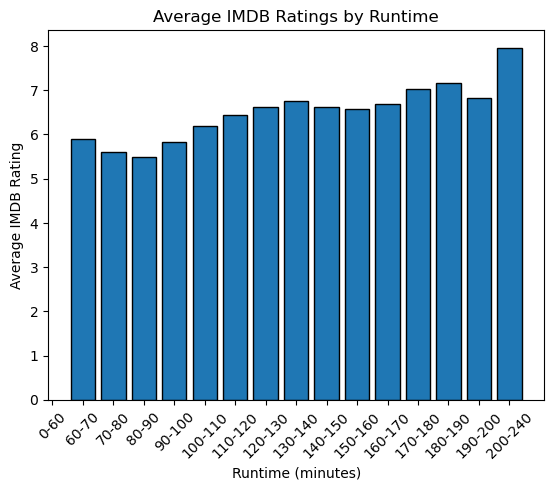

In [99]:
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_43088/3522306480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)
/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_43088/3522306480.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()


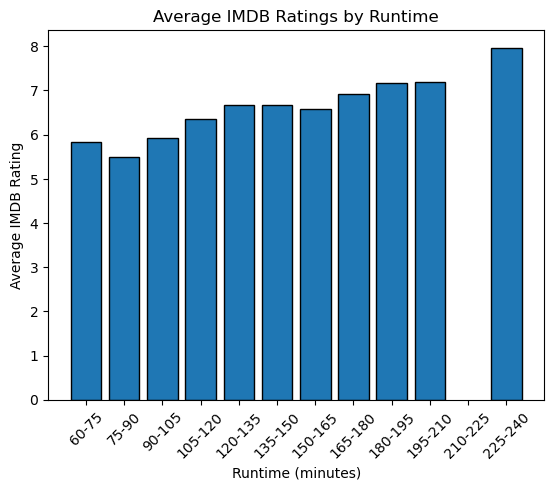

In [100]:
bins = [0, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Cut the 'Runtime' into bins
cleaned_movie['Runtime Group'] = pd.cut(cleaned_movie['Runtime'], bins=bins, labels=labels, right=False)

# Calculate the average rating for each bin
average_ratings = cleaned_movie.groupby('Runtime Group')['imdbRating'].mean()

# Plotting the average ratings
plt.bar(average_ratings.index, average_ratings.values, edgecolor='black')

# Add titles and labels
plt.title('Average IMDB Ratings by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

In [60]:
#cleaned_movie.boxplot("imdbRating", by="Runtime", figsize=(20,10))

In [102]:
#Extract groups by Runtime and IMDB rating
group0 = cleaned_movie[(cleaned_movie['Runtime'] >= 60) & (cleaned_movie['Runtime'] <= 75)]['imdbRating'].mean()
group1 = cleaned_movie[(cleaned_movie['Runtime'] >=76) & (cleaned_movie['Runtime'] <= 90)]['imdbRating'].mean()
group2 = cleaned_movie[(cleaned_movie['Runtime'] >=91) & (cleaned_movie['Runtime']<= 105)]['imdbRating'].mean()
group3 = cleaned_movie[(cleaned_movie['Runtime'] >=106) & (cleaned_movie['Runtime']<= 120)]['imdbRating'].mean()
group4 = cleaned_movie[(cleaned_movie['Runtime'] >=121) & (cleaned_movie['Runtime']<= 135)]['imdbRating'].mean()
group5 = cleaned_movie[(cleaned_movie['Runtime'] >=136) & (cleaned_movie['Runtime']<= 150)]['imdbRating'].mean()
group6 = cleaned_movie[(cleaned_movie['Runtime'] >=151) & (cleaned_movie['Runtime']<= 165)]['imdbRating'].mean()
group7 = cleaned_movie[(cleaned_movie['Runtime'] >=166) & (cleaned_movie['Runtime']<= 180)]['imdbRating'].mean()
group8 = cleaned_movie[(cleaned_movie['Runtime'] >=181) & (cleaned_movie['Runtime']<= 195)]['imdbRating'].mean()
group9 = cleaned_movie[(cleaned_movie['Runtime'] >=196) & (cleaned_movie['Runtime']<= 210)]['imdbRating'].mean()
group10 = cleaned_movie[(cleaned_movie['Runtime'] >=225) & (cleaned_movie['Runtime']<= 240)]['imdbRating'].mean()

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)